#  *** DRAFT ***
##### Author: Omer Nivron
##### Date: 04/09/19
#####  Data source: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package 

In [1]:
from src.aus_rain_cleanup import *
from src.aus_rain_feat_eng import *
from src.aus_rain_modeling import *
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
australian_rain_df = pd.read_csv('./data/weatherAUS.csv')

# Report - Australian rain prediction 

###### Results:    ~85% success rate in predicting tomorrow's rain outcome (still plenty of potential)
####                      - The most important features to predict rain are locations and wind directions. Whether it rained today doesn't seem very important from the model (however it might just be correlated with another variable)

### Heatmap of Rainfall in January 2010

![Rainfall Map](rainfall_map.png)

### Assumptions
 - Missing values are reasonably replaced by mode and median per month and location for categorical and numeric columns respictively 
 - It is valid to drop columns with missing value share greater than 0.35
 - Inheirt Tree model assumptions

### Open issues/ problems

- Model is overfitting: learning can't generalize well to new data  

### Analysis method explained

The analysis included cleaning data with the main issue being plenty missing values; Grouping by year, month and location, the median was used for numeric columns since it's more reliable when data isn't symmetric; The mode was used for categorical columns. Other cleaning procedures included formating (e.g. string to date). I then transformed categorical variables to one-hot encodings since the model can't handle strings. Then I split the data to training data (everything prior to 2015) and test data that was never seen by the model (2015 onwards) and is used to asses results on unseen data. After all data was model ready I ran it once with a decision tree model and a random forest model. Currently our metric is misclassification rate: how many times our model got it wrong divided by size of data (this metric might be misleading and future work should consider other options)   

##### Why did I choose the tree based models for the task ? 

- Can deal better than other models with missing values (depending implementation)
- No need to normalize data or make any transformations
- Quick predictions 
- Robust to outliers
- Easy interpretability (variable importance and selection)
- Empirically strong results 

### Run analysis

In [3]:
####### Cleanup #######
cat_cols, num_cols, australian_rain_df = cleanup(australian_rain_df)
df = australian_rain_df
######
###### Feature engineering ######
australian_rain_df = transform_to_dummies(australian_rain_df, list(cat_cols) + ['Location'])
######
###### Modelling ######
feat_importance, results_pd = model(australian_rain_df)
######

There are 0 duplicated dates here!


### Plots

<h3 style="color:blue;"> USER INPUT -  Change location/month to see other distributions  </h3>

In [4]:
loc = 'Adelaide'
mon = 4

# Move Graph Code Below to Function Notebook?

[[None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

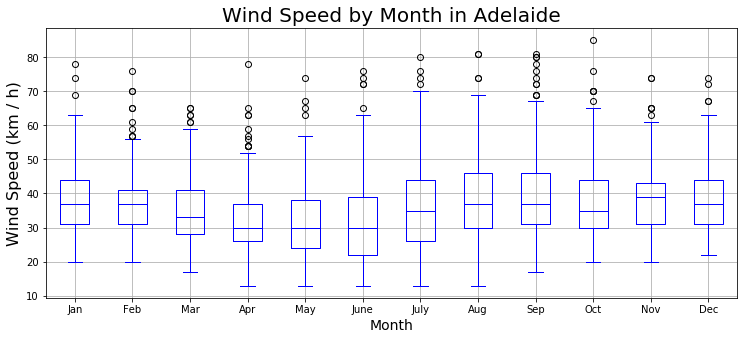

In [5]:
# Example distribution to why we use the median as a missing value replacement 
boxprops = dict(color='b')
medianprops = dict(color='b')



bp = df[df['Location'] == loc].boxplot(column='WindGustSpeed', by =['Month'], figsize = (12, 5), 
                                      boxprops = boxprops, medianprops = medianprops, return_type = 'dict')

plt.ylabel('Wind Speed (km / h)', fontsize = 16)
plt.xlabel('Month', fontsize = 14)
plt.xticks(list(range(1,13)), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.suptitle('')
plt.title('Wind Speed by Month in Adelaide', fontsize = 20)

[[item.set_color('b') for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_color('b') for item in bp[key]['fliers']] for key in bp.keys()]
[[item.set_color('b') for item in bp[key]['medians']] for key in bp.keys()]
[[item.set_markerfacecolor('b') for item in bp[key]['means']] for key in bp.keys()]
[[item.set_color('b') for item in bp[key]['whiskers']] for key in bp.keys()]
[[item.set_color('b') for item in bp[key]['caps']] for key in bp.keys()]

#### Important correlations

Text(0.5, 1.0, 'Correlation plot between temperture (x) at 3pm to max temperture (y)')

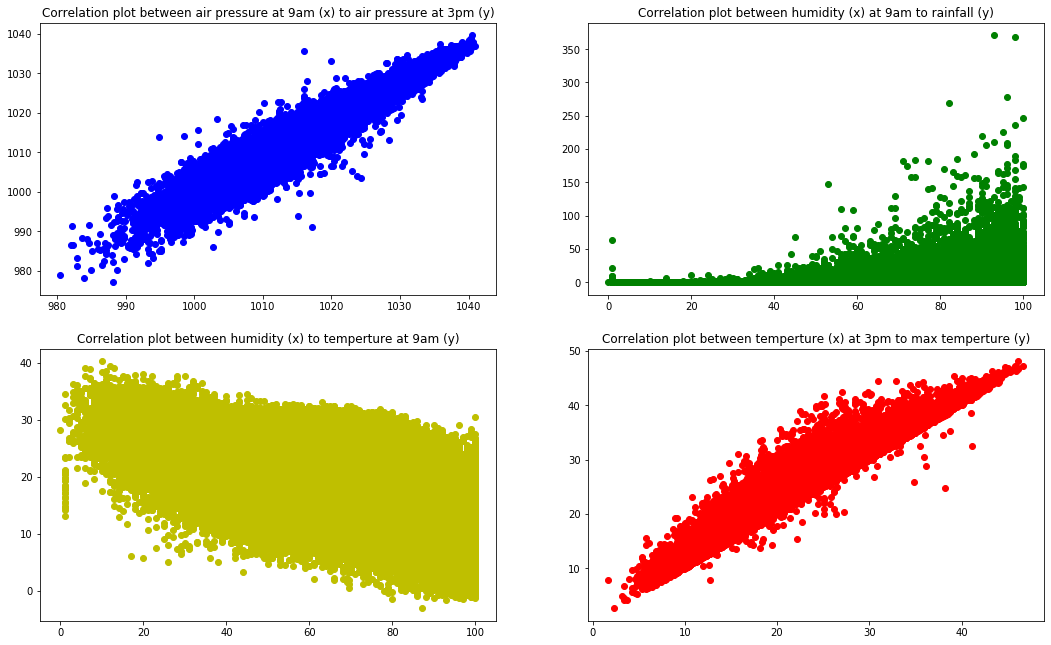

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2 , figsize=(18, 11))
plt.subplot(2, 2, 1)
plt.scatter(df.loc[:,'Pressure9am'], df.loc[:, 'Pressure3pm'], color='b')
plt.title('Correlation plot between air pressure at 9am (x) to air pressure at 3pm (y)')

plt.subplot(2, 2, 2)
plt.scatter(df.loc[:,'Humidity9am'], df.loc[:, 'Rainfall'], color='g')
plt.title('Correlation plot between humidity (x) at 9am to rainfall (y)')

plt.subplot(2, 2, 3)
plt.scatter(df.loc[:,'Humidity9am'], df.loc[:, 'Temp9am'], color='y')
plt.title('Correlation plot between humidity (x) to temperture at 9am (y)')

plt.subplot(2, 2, 4)
plt.scatter(df.loc[:,'Temp3pm'], df.loc[:, 'MaxTemp'], color='r')
plt.title('Correlation plot between temperture (x) at 3pm to max temperture (y)')

#### Categorical varibales

In [7]:
wind_gust_bar_data = df.loc[df['Location'] == loc, ['Location', 'WindGustDir', 'Month']].groupby(['WindGustDir','Month']).count().reset_index()
wind_dir3pm_bar_data = df.loc[df['Location'] == loc, ['Location', 'WindDir3pm', 'Month']].groupby(['WindDir3pm','Month']).count().reset_index()
wind_dir9am_bar_data = df.loc[df['Location'] == loc, ['Location', 'WindDir9am', 'Month']].groupby(['WindDir9am','Month']).count().reset_index()

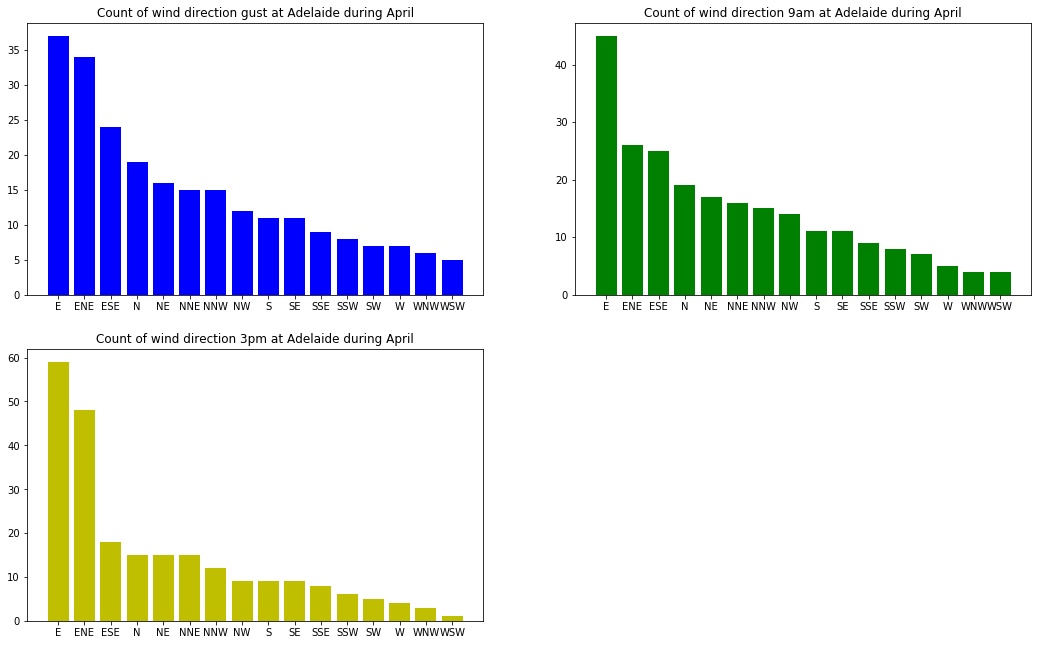

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2 , figsize=(18, 11))
plt.subplot(2, 2, 1)
plt.bar(wind_gust_bar_data.loc[wind_gust_bar_data['Month'] == mon,'WindGustDir'], wind_gust_bar_data.loc[wind_gust_bar_data['Month'] == 4, 'Location'].sort_values(ascending = False), color='b')
plt.title('Count of wind direction gust at Adelaide during April')

plt.subplot(2, 2, 2)
plt.bar(wind_dir9am_bar_data.loc[wind_dir9am_bar_data ['Month'] == mon,'WindDir9am'], wind_dir9am_bar_data.loc[wind_dir9am_bar_data['Month'] == 4, 'Location'].sort_values(ascending = False), color= 'g')
plt.title('Count of wind direction 9am at Adelaide during April')

plt.subplot(2, 2, 3)
plt.bar(wind_dir3pm_bar_data.loc[wind_dir3pm_bar_data['Month'] == mon,'WindDir3pm'], wind_dir3pm_bar_data.loc[wind_dir3pm_bar_data['Month'] == 4, 'Location'].sort_values(ascending = False), color= 'y')
plt.title('Count of wind direction 3pm at Adelaide during April')

fig.delaxes(axes[1][1])

# Model results

In [9]:
results_pd.reset_index(drop=True)

,Model,Training misclassification,Test misclassification,Runtime
0,-,-,-,-
1,Tree,0.0,0.22,0.02
2,Random forest,0.0,0.15,0.19


### To do's 

 - Exploration:
1. Check for areas where it never rains and drop from dataset 
2. Check the correlations of variables with rain today status 
 
        
 - Model : 
1. Add a baseline model for comparison 
2. Hyperparameter optimization
3. Consider logistic regression model
4. Balance data (sampling)
5. Add true-pos and false-pos metrics
6. Add ROC curve
